In [1]:
import mediapipe as mp  # Import mediapipe
import cv2  # Import opencv
import csv
import os
import numpy as np
import time
import matplotlib
from matplotlib import pyplot as plt
import sklearn

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [8]:
def draw_mark(image, results):
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

def cap_imag():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    k =cv2.waitKey(1500)
    cap.release()
    cv2.destroyAllWindows()
    return ret ,image

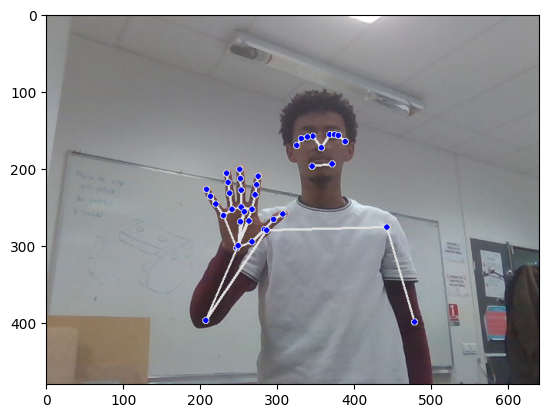

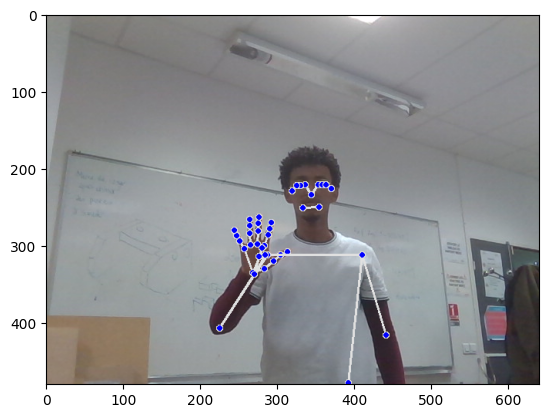

In [10]:
with mp_holistic.Holistic(static_image_mode=True) as holistic :
    
    ret,image=cap_imag()
    ret2,image2=cap_imag()

    results = holistic.process(image)
    results2 = holistic.process(image2)

    draw_mark(image2, results2)
    draw_mark(image, results)

plt.imshow(image)
plt.show()

plt.imshow(image2)
plt.show()

In [11]:
distance_epaules = 40
distance_nez = 20
origine1 = [(results.pose_landmarks.landmark[11].x+results.pose_landmarks.landmark[12].x)/2,(results.pose_landmarks.landmark[11].y+results.pose_landmarks.landmark[12].y)/2,(results.pose_landmarks.landmark[11].z+results.pose_landmarks.landmark[12].z)/2] #origine de l'image 1
distance1x = abs(results.pose_landmarks.landmark[11].x-results.pose_landmarks.landmark[12].x) #distance en x à normaliser
distance1y = abs(results.pose_landmarks.landmark[0].y-origine1[1])  #distance en y à normaliser
print(origine1)
pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
coords = np.concatenate([pose,lh,rh])
eg_ref = -0.1           
nez_ref= -0.25
for i in range (0,int(np.shape(coords)[0])):
        coords[i] -= origine1[i%3]
x_coeff = eg_ref/coords[11*3]
y_coeff = nez_ref/coords[1]
for i in range (0,int(np.shape(coords)[0])):
    if(i%3==0):
        coords[i]*=x_coeff
    elif (i%1==0):
        coords[i]*=y_coeff



[0.5691438913345337, 0.5807517468929291, -0.07682469300925732]


In [13]:
origine2 = [(results2.pose_landmarks.landmark[11].x+results2.pose_landmarks.landmark[12].x)/2,(results2.pose_landmarks.landmark[11].y+results2.pose_landmarks.landmark[12].y)/2,(results2.pose_landmarks.landmark[11].z+results2.pose_landmarks.landmark[12].z)/2] #origine de l'image 1
distance2x = abs(results2.pose_landmarks.landmark[11].x-results2.pose_landmarks.landmark[12].x) #distance en x à normaliser
distance2y = abs(results2.pose_landmarks.landmark[0].y-origine1[1])  #distance en y à normaliser
print(origine2)
pose2 = np.array([[res.x, res.y, res.z] for res in results2.pose_landmarks.landmark]).flatten() if results2.pose_landmarks else np.zeros(33*3)
lh2= np.array([[res.x, res.y, res.z] for res in results2.left_hand_landmarks.landmark]).flatten() if results2.left_hand_landmarks else np.zeros(21*3)
rh2 = np.array([[res.x, res.y, res.z] for res in results2.right_hand_landmarks.landmark]).flatten() if results2.right_hand_landmarks else np.zeros(21*3)
coords2 = np.concatenate([pose,lh,rh])
eg_ref = -0.1
nez_ref= -0.25
for i in range (0,int(np.shape(coords2)[0])):
        coords2[i] -= origine2[i%3]

x_coeff2 = eg_ref/coords2[11*3]
y_coeff2 = nez_ref/coords2[1]

for i in range (0,int(np.shape(coords2)[0])):
    if(i%3==0):
        coords2[i]*=x_coeff2
    elif (i%1==0):
        coords2[i]*=y_coeff2

[0.5451046079397202, 0.6505537331104279, -0.14106860756874084]


In [18]:
print(abs(abs(coords)-abs(coords2)))
print("COORDS 1")
print(coords)
print("COORDS 2")
print(coords2)

[1.47720577e-03 2.77555756e-17 1.53364345e-01 1.55784305e-02
 9.62275647e-03 1.44100204e-01 1.42444980e-02 9.60698147e-03
 1.44094012e-01 1.31597608e-02 9.27565739e-03 1.44071586e-01
 2.01726508e-02 8.53642759e-03 1.42940938e-01 2.16978904e-02
 7.69134313e-03 1.42917726e-01 2.32342068e-02 6.96512812e-03
 1.42970866e-01 1.12675991e-02 4.50717715e-03 8.50130886e-02
 2.45721847e-02 1.63269583e-03 7.75099643e-02 1.49471347e-02
 1.23516999e-02 1.32442678e-01 2.03675298e-02 1.39291341e-02
 1.30412847e-01 0.00000000e+00 5.91831618e-02 5.72347828e-03
 3.28927681e-02 5.20225839e-02 4.71164539e-02 7.66915669e-03
 1.29352839e-01 4.38272547e-04 4.93616348e-02 1.28230406e-01
 1.27237060e-01 1.06421547e-02 1.89350903e-01 1.24627526e-01
 4.05855472e-02 3.02607672e-02 2.74840006e-01 1.26825766e-02
 2.10545718e-01 1.42484675e-01 4.00369780e-02 5.52560557e-02
 3.02569814e-01 1.02586094e-02 2.08838054e-01 1.53824466e-01
 3.89191710e-02 4.75407224e-02 2.97915567e-01 8.73675700e-03
 1.99639347e-01 1.317552